In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df=pd.read_csv('slump.csv')

In [3]:
df.head()

,Cement,Slag,Fly ash,Water,SP,Coarse,Fine,SLUMP,FLOW,Strength
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


In [4]:
df.shape

(103, 10)

In [5]:
df.isnull().sum()

Cement      0
Slag        0
Fly ash     0
Water       0
SP          0
Coarse      0
Fine        0
SLUMP       0
FLOW        0
Strength    0
dtype: int64

In [6]:
df.dtypes

Cement      float64
Slag        float64
Fly ash     float64
Water       float64
SP          float64
Coarse      float64
Fine        float64
SLUMP       float64
FLOW        float64
Strength    float64
dtype: object

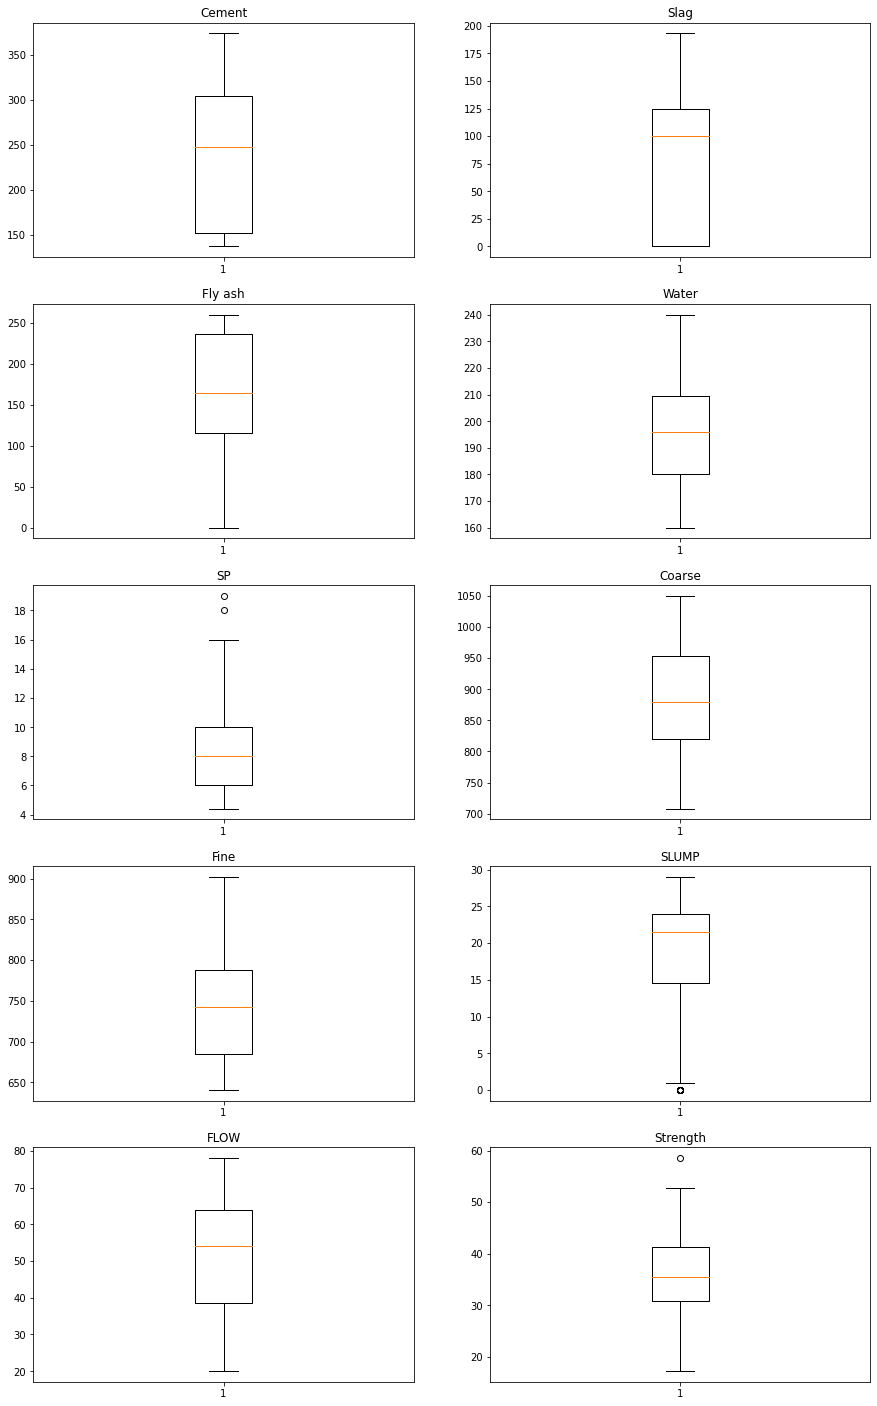

In [7]:
plt.figure(figsize = (15,25))
count = 1
for col in df:
    plt.subplot(5,2,count)
    plt.boxplot(df[col])
    plt.title(col)
    count +=1    
plt.show()

In [12]:
df.corr()

,Cement,Slag,Fly ash,Water,SP,Coarse,Fine,SLUMP,FLOW,Strength
Cement,1.000000,-0.243553,-0.486535,0.221091,-0.106387,-0.309857,0.056959,0.145913,0.186461,0.445725
Slag,-0.243553,1.000000,-0.322619,-0.026775,0.306504,-0.223792,-0.183522,-0.284037,-0.327231,-0.331588
Fly ash,-0.486535,-0.322619,1.000000,-0.241321,-0.143508,0.172620,-0.282854,-0.118621,-0.055423,0.444393
Water,0.221091,-0.026775,-0.241321,1.000000,-0.155456,-0.602201,0.114591,0.466568,0.632026,-0.254235
SP,-0.106387,0.306504,-0.143508,-0.155456,1.000000,-0.104159,0.058290,-0.212902,-0.176314,-0.037871
Coarse,-0.309857,-0.223792,0.172620,-0.602201,-0.104159,1.000000,-0.488537,-0.188157,-0.325787,-0.160684
Fine,0.056959,-0.183522,-0.282854,0.114591,0.058290,-0.488537,1.000000,0.202272,0.190370,-0.154484
SLUMP,0.145913,-0.284037,-0.118621,0.466568,-0.212902,-0.188157,0.202272,1.000000,0.906135,-0.223358
FLOW,0.186461,-0.327231,-0.055423,0.632026,-0.176314,-0.325787,0.190370,0.906135,1.000000,-0.124029
Strength,0.445725,-0.331588,0.444393,-0.254235,-0.037871,-0.160684,-0.154484,-0.223358,-0.124029,1.000000


In [18]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [22]:
x.shape

(103, 9)

In [23]:
y.shape

(103,)

In [24]:
y=y.reshape(-1,1)

In [29]:
sc=StandardScaler()
x=sc.fit_transform(x)

In [30]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [36]:
mse = []
r2 = []
for i in range (1,10):
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    mse_i = mean_squared_error(y_test,y_pred)
    mse.append(mse_i)
    r2_i=r2_score(y_test,y_pred)
    r2.append(r2_i)

In [38]:
model=KNeighborsRegressor(n_neighbors=2)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [39]:
r2_score(y_test,y_pred)

0.8028411170170824